In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
train_df = pd.read_csv('C:/Users/Ishwarya Medudula/Downloads/ash/archive/twitter_training.csv', header=None)
val_df = pd.read_csv('C:/Users/Ishwarya Medudula/Downloads/ash/archive/twitter_validation.csv', header=None)


In [5]:
columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']
train_df.columns = columns
val_df.columns = columns

In [6]:
print("Training Data Sample:")
print(train_df.head())

Training Data Sample:
   Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [7]:
print("\nValidation Data Sample:")
print(val_df.head())


Validation Data Sample:
   Tweet_ID     Entity   Sentiment  \
0      3364   Facebook  Irrelevant   
1       352     Amazon     Neutral   
2      8312  Microsoft    Negative   
3      4371      CS-GO    Negative   
4      4433     Google     Neutral   

                                               Tweet  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [8]:
print("\nMissing values:\n", train_df.isnull().sum())


Missing values:
 Tweet_ID       0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


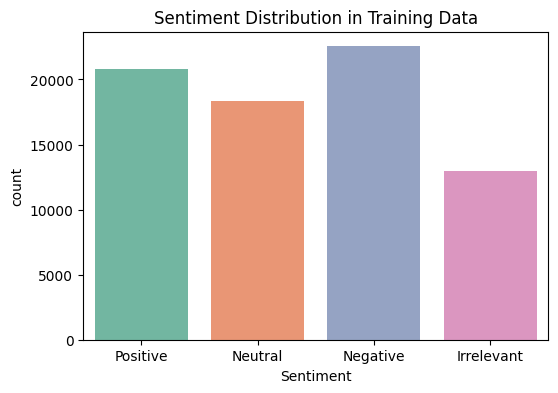

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, hue='Sentiment', x='Sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution in Training Data')
plt.show()


In [22]:
def preprocess(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch.isalnum() or ch.isspace()])
    return text


In [25]:
def preprocess(text):
    if pd.isnull(text):
        return ""
    return text.lower()  # simple example

train_df['cleaned'] = train_df['Tweet'].apply(preprocess)
val_df['cleaned'] = val_df['Tweet'].apply(preprocess)


In [26]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['cleaned'])
y = train_df['Sentiment']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.54      0.60      2592
    Negative       0.74      0.79      0.76      4519
     Neutral       0.69      0.63      0.66      3596
    Positive       0.67      0.76      0.71      4230

    accuracy                           0.70     14937
   macro avg       0.69      0.68      0.68     14937
weighted avg       0.70      0.70      0.70     14937



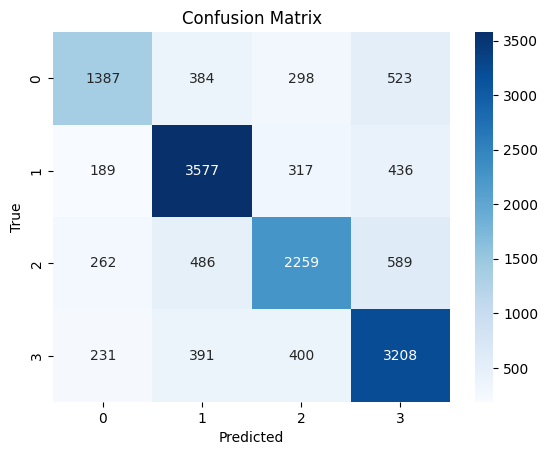

In [30]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
X_val = vectorizer.transform(val_df['cleaned'])
y_val = val_df['Sentiment']
val_pred = model.predict(X_val)
print("Validation Set Report:\n", classification_report(y_val, val_pred))

Validation Set Report:
               precision    recall  f1-score   support

  Irrelevant       0.79      0.71      0.75       172
    Negative       0.77      0.86      0.81       266
     Neutral       0.84      0.74      0.79       285
    Positive       0.79      0.84      0.81       277

    accuracy                           0.80      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.80      0.79      1000

